# Test trained model on test data
Day of the year (DOY) acquisition and plot on the test data.

In [1]:
import sys
sys.path.append("..")
from data import BavarianCrops, BreizhCrops, SustainbenchCrops, ModisCDL, LABELS_NAMES, SELECTED_BANDS
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.helpers import load_model, test
from utils.doy import get_doy_stop, get_doys_dict_test, get_approximated_doy, get_closest_length_key, create_sorted_doys_dict_test
from utils.plots import boxplot_stopping_times

device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

device: cpu


In [2]:
data_root = "../elects_data"
test_ds = BreizhCrops(root=data_root,partition="eval", sequencelength=150, year=2017, return_id = True)
classes = test_ds.ds.classname
print(classes)

1555075632 1555075632


loading data into RAM: 100%|██████████| 122614/122614 [01:03<00:00, 1940.97it/s]

['barley' 'wheat' 'rapeseed' 'corn' 'sunflower' 'orchards' 'nuts'
 'permanent meadows' 'temporary meadows']


In [3]:
nclasses = 9
input_dim = 13
model_path = "../models/breizhcrops_models/model_clean-disco-57.pth"
model = load_model(model_path, nclasses=nclasses, input_dim=input_dim, map_location=device)  
stats = test(test_ds, model, map_location=device)


  0%|          | 0/479 [00:00<?, ?it/s]

In [4]:
npy_doy_path = 'breizhcrops_frh04_2017_doys.npy'
doys_dict = get_doys_dict_test(npy_doy_path)


In [5]:
doys_stop = get_doy_stop(stats, doys_dict)

doys_dict.keys(): dict_keys([6017564, 6054675, 6018665, 6019318, 6019435, 6019436, 6057048, 6017566, 6022687, 6022885, 6023168, 6017292, 6017293, 6017296, 6017297, 6017298, 6017299, 6017302, 6017306, 6017307, 6017308, 6017336, 6017317, 6017318, 6017319, 6017320, 6017321, 6017322, 6061943, 6017323, 6017324, 6017325, 6017326, 6017328, 6017329, 6017330, 6017331, 6017333, 6017334, 6017335, 6063883, 6017337, 6017338, 6017339, 6017340, 6017341, 6017343, 6017344, 6017346, 6017350, 6017351, 6017352, 6017353, 6017354, 6017359, 6017362, 6017366, 6017370, 6017371, 6017372, 6017374, 6017375, 6017376, 6017377, 6017378, 6017379, 6017381, 6017382, 6017383, 6017384, 6066037, 6017387, 6017388, 6017389, 6017390, 6017391, 6017392, 6017393, 6017394, 6017395, 6017396, 6017397, 6017398, 6017399, 6017400, 6017401, 6017403, 6017404, 6017405, 6017406, 6017407, 6017411, 6017412, 6017413, 6017414, 6017415, 6017416, 6017417, 6017418, 6017419, 6017420, 6017422, 6017423, 6017424, 6017426, 6017427, 6017428, 6017431,

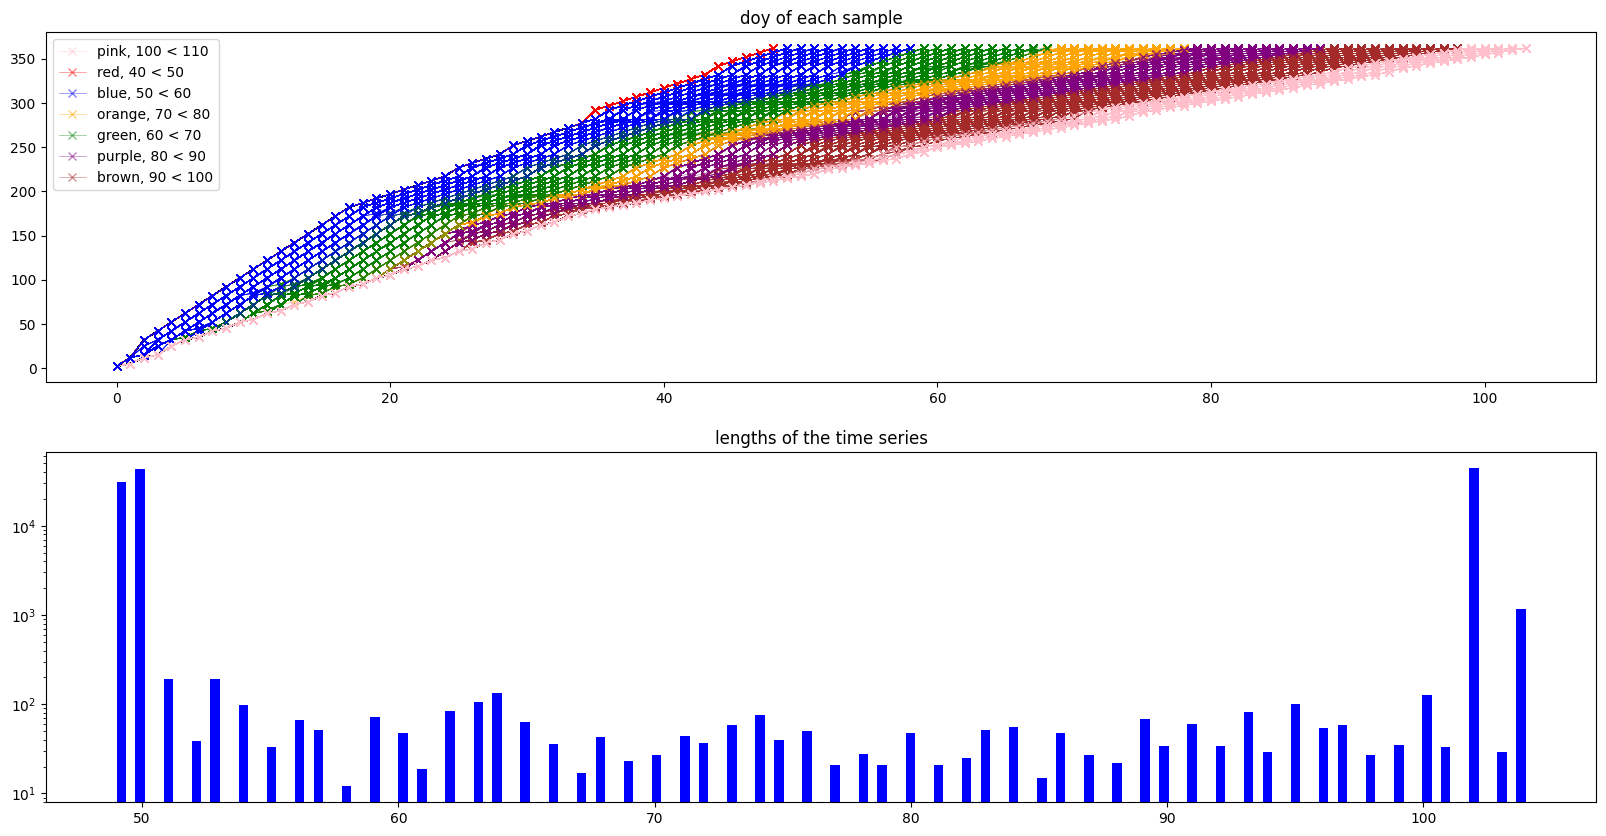

In [6]:
# takes about 3 minute to plot
# get some information about doys_dict
print("doys_dict.keys():", doys_dict.keys())
print("len(doys_dict.keys()):", len(doys_dict.keys()))
print("doys_dict[6017564].shape:", doys_dict[6017564].shape)

# for each sequence lengths among [<50, <60, <70, <80, <90, <100, <110], give a different color
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']
already_used_colors = []
corresponding_length = [50, 60, 70, 80, 90, 100, 110]

def conversion_index_color(length):
    return int(length/10)-4


# for each element in doys_dict.flat[0], plot the array
fig, axes = plt.subplots(2, figsize=(20,10))
lengths = []
for key in doys_dict.keys():
    length = len(doys_dict[key])
    lengths.append(length)
    # attribute the color
    color = colors[int(length/10)-4]
    if color not in already_used_colors:
        already_used_colors.append(color)
        label=str(color)+", "+str(corresponding_length[conversion_index_color(length)]-10) +" < "+str(corresponding_length[conversion_index_color(length)])
    else:
        label=None
    axes[0].plot(doys_dict[key], label=label, alpha=0.5, linewidth=0.5, marker='x', color=color)
axes[0].set_title("doy of each sample")
axes[0].legend()
axes[1].hist(lengths, bins=150, log=True, color='blue')
# print the different unique lengths:
print("unique lengths:", np.unique(lengths))
axes[1].set_title("lengths of the time series")
plt.show()

In [6]:
length_sorted_doys_dict = create_sorted_doys_dict_test(doys_dict)
print("sorted_doys_dict.keys():", length_sorted_doys_dict.keys())


sorted_doys_dict.keys(): dict_keys([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104])


In [7]:
# test the functions for doys

print("example, length 50:", get_closest_length_key(50, doys_dict))
print("length of the sequence:", len(get_approximated_doy(50, doys_dict)))

print("example, length 60:", get_closest_length_key(67, doys_dict))
print("length of the sequence:", len(get_approximated_doy(67, doys_dict)))

print("example, length 93:", get_closest_length_key(93, doys_dict))
print("length of the sequence:", len(get_approximated_doy(93, doys_dict)))

print("example, length 130:", get_closest_length_key(130, doys_dict))
print("length of the sequence:", len(get_approximated_doy(130, doys_dict)))


example, length 50: 6019435
length of the sequence: 50
example, length 60: 6019025
length of the sequence: 67
example, length 93: 6019694
length of the sequence: 93
example, length 130: 6017570
length of the sequence: 130


From this plot above, we can conclude that we could determine the day of the year (DOY) of the acquisition of the image, by approximating the doy with the lengths of the sequence. Note that it is an _approximation_, we will use it as indicator during training.

c:\Users\anyam\Desktop\Master_thesis\Code\elects\EDA\..\utils\plots.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.boxplot(x=doy_stop,y=stats["targets"][:,0],orient="h",ax=ax,showfliers=False, palette=colors[:len(labels_names)])


(<Figure size 1500x700 with 1 Axes>, <Axes: xlabel='day of year'>)

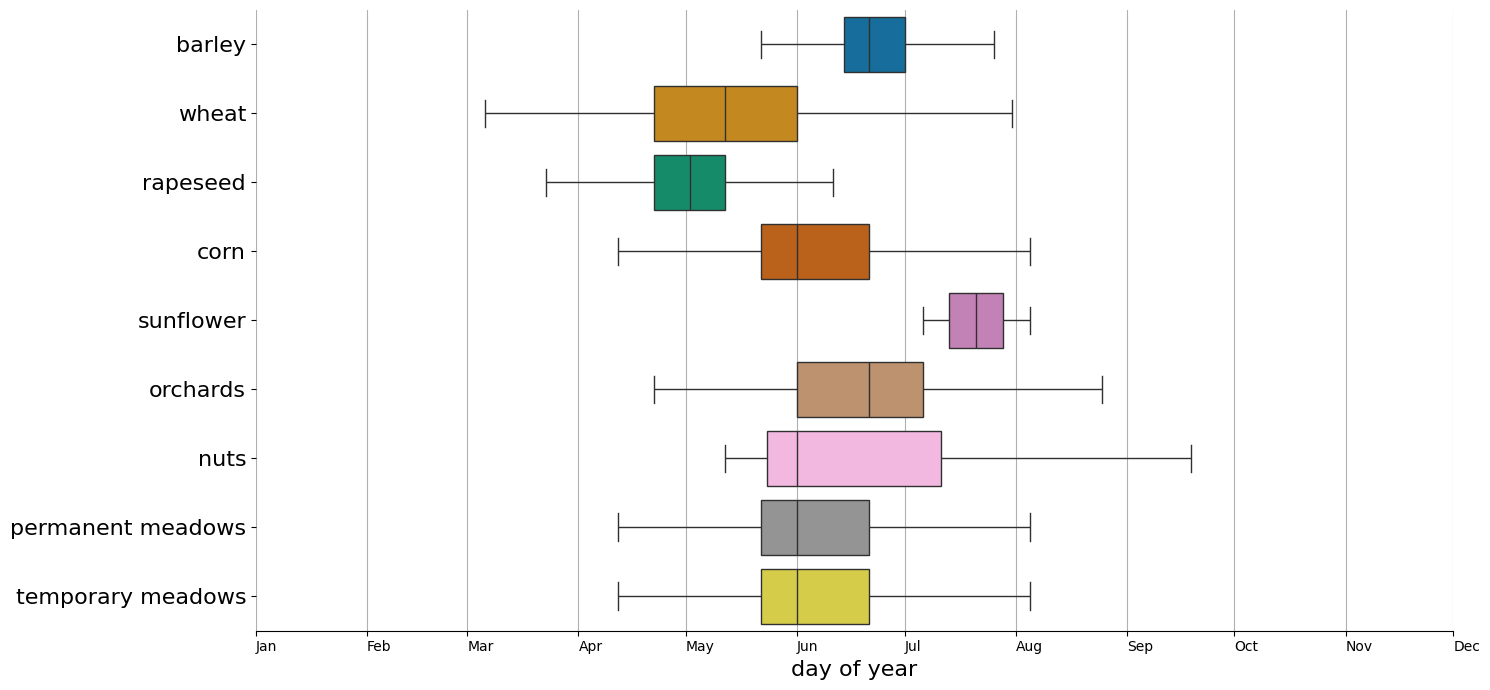

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
boxplot_stopping_times(doys_stop, stats, fig, ax, classes)